In [70]:
#importing libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
data = pd.read_csv('NetflixDataset.csv',encoding='latin-1', index_col = 'Title')
data.head()

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,...,NaN,NaN,03-Dec-20,03-03-2021,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,...,4.0,NaN,14-Jun-11,03-03-2021,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,...,1.0,NaN,31-Oct-49,03-03-2021,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [72]:
data.index = data.index.str.title()
data.head()

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
How To Build A Girl,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,...,NaN,NaN,03-Dec-20,03-03-2021,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
Gleboka Woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,...,4.0,NaN,14-Jun-11,03-03-2021,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
Only A Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,...,1.0,NaN,31-Oct-49,03-03-2021,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


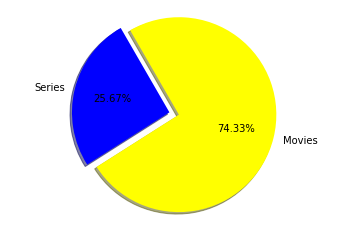

In [73]:
color = ['blue', 'yellow']
label = ['Series', 'Movies']
sizes = [data[data['Series or Movie'] == 'Series'].size, data[data['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode, label, color, '%2.2f%%', shadow = True, startangle = 120)
ax.axis('equal')
plt.show()

In [74]:
netflix_data = data
netflix_data.head()

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
How To Build A Girl,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,...,NaN,NaN,03-Dec-20,03-03-2021,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
Gleboka Woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,...,4.0,NaN,14-Jun-11,03-03-2021,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
Only A Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,...,1.0,NaN,31-Oct-49,03-03-2021,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [103]:
netflix_data = netflix_data[~netflix_data.index.duplicated()]

In [75]:
netflix_data.rename(columns={'View Rating':'ViewerRating'}, inplace=True)

In [76]:
Language = netflix_data.Languages.str.get_dummies(',')
Lang = Language.columns.str.strip().values.tolist()
print(len(Lang))
Language = netflix_data['Languages']
Language_Count = dict()
for i in Lang:
    p = Language.str.count(i).sum()
    Language_Count[i] = int(p)
print(len(Language_Count))

270
184


In [77]:
Language_Count = {k: v for k, v in sorted(Language_Count.items(), key=lambda item: item[1], reverse = True)}
top_languages = {"Languages": list(Language_Count.keys()), "Count": list(Language_Count.values())}

In [78]:
fig = px.bar(pd.DataFrame(top_languages)[:10], y = 'Languages', x = 'Count', orientation = 'h', title = 'Most Available Languages', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
fig.show()

In [79]:
Genres = netflix_data.Genre.str.get_dummies(',')
Genre = Genres.columns.str.strip().values.tolist()
print(len(Genre))
Genres = netflix_data['Genre']
Genre_Count = dict()
for i in Genre:
    p = Genres.str.count(i).sum()
    Genre_Count[i] = int(p)
print(len(Genre_Count))

54
28


In [80]:
Genre_Count = {k: v for k, v in sorted(Genre_Count.items(), key=lambda item: item[1], reverse = True)}
top_genres = {"Genre": list(Genre_Count.keys()), "Count": list(Genre_Count.values())}

In [81]:
fig = px.bar(pd.DataFrame(top_genres)[:10], y = 'Genre', x = 'Count', orientation = 'h', title = 'Genres with maximum content', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
fig.show()

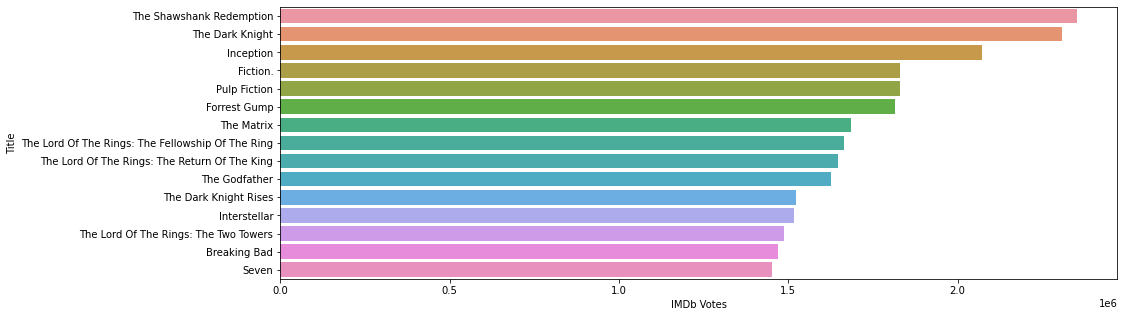

In [82]:
top_15 = data.sort_values(by = ['IMDb Votes'], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(data = top_15, y = top_15.index, x = "IMDb Votes")
plt.show()

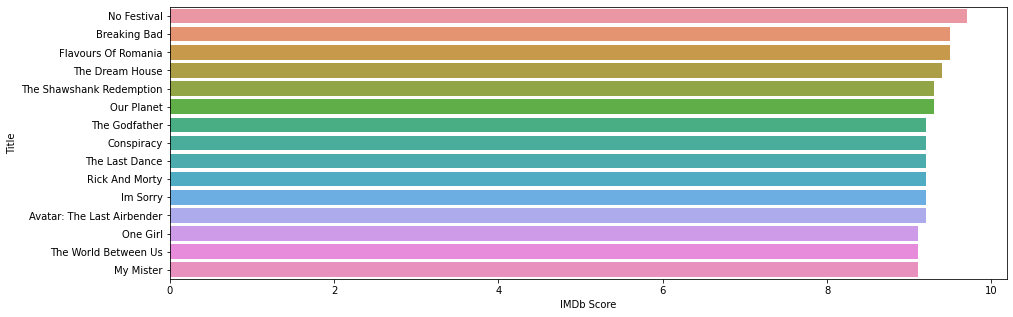

In [83]:
top_15 = data.sort_values(by = ['IMDb Score'], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(data = top_15, y = top_15.index, x = "IMDb Score")
plt.show()

In [84]:
netflix_data.duplicated().sum()

0

In [85]:
netflix_data.index.isnull().sum()

0

In [86]:
netflix_data['Genre'] = netflix_data['Genre'].astype('str')
print((netflix_data['Genre'] == 'nan').sum())

25


In [87]:
netflix_data['Tags'] = netflix_data['Tags'].astype('str')
print((netflix_data['Tags'] == 'nan').sum())

37


In [88]:
print(((netflix_data['Genre'] == 'nan') & (netflix_data['Tags'] == 'nan')).sum())
#so these two features can used to recommend movies as no movie can be left unrecommended

0


In [89]:
print(netflix_data[['IMDb Score']].describe())
netflix_data['IMDb Score'].mode()
#this feature can be used to sort the movie or series list to represent the recommended items

        IMDb Score
count  9395.000000
mean      6.954902
std       0.899448
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


0    6.6
dtype: float64

In [90]:
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].apply(lambda x: 6.6 if x == 0 or math.isnan(x) else x)
print(netflix_data[['IMDb Score']].describe())
#since no value has suffered for change greater than 0.0003 after replacing the null values with mode value, so we replace the null values with 6.6

        IMDb Score
count  9403.000000
mean      6.954600
std       0.899124
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


In [91]:
netflix_data['Actors'] = netflix_data['Actors'].astype('str')
netflix_data['ViewerRating'] = netflix_data['ViewerRating'].astype('str')

In [92]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [93]:
new_features = ['Genre', 'Tags', 'Actors', 'ViewerRating']
selected_data = netflix_data[new_features]
selected_data.head()

,Genre,Tags,Actors,ViewerRating
Title,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R
How To Build A Girl,Comedy,"Dramas,Comedies,Films Based on Books,British","Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",nan
Gleboka Woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas","Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",nan
Only A Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...","Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",nan


In [94]:
selected_data.Genre = selected_data.Genre.apply(clean_data)
selected_data.Tags = selected_data.Tags.apply(clean_data)
selected_data.Actors = selected_data.Actors.apply(clean_data)
selected_data.ViewerRating = selected_data.ViewerRating.apply(clean_data)
selected_data.index = selected_data.index.str.lower()
selected_data.index = selected_data.index.str.replace(" ",'')
selected_data

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating
Title,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r
thecon-heartist,"comedy,romance","romanticcomedies,comedies,romanticfilms,thaico...","kathaleeyamcintosh,nadechkugimiya,pimchanokleu...",nan
glebokawoda,drama,"tvdramas,polishtvshows,socialissuetvdramas","katarzynamaciag,piotrnowak,marcindorocinski,ju...",nan
onlyamother,drama,"socialissuedramas,dramas,moviesbasedonbooks,pe...","hugobjörne,evadahlbeck,ulfpalme,ragnarfalck",nan
...,...,...,...,...
13goingon30,"comedy,fantasy,romance","romanticcomedies,comedies,romanticfilms,romant...","andyserkis,jennifergarner,markruffalo,judygreer",pg-13
life2.0,documentary,"social&culturaldocumentaries,biographicaldocum...",teasacopprue,notrated
brandnewday,"documentary,music","australiancomedies,romanticcomedies,australian...","ryuichisakamoto,clemburke,annielennox,patricks...",nan


In [95]:
def create_soup(x):
    return x['Genre'] + ' ' + x['Tags'] + ' ' +x['Actors']+' '+ x['ViewerRating']

In [96]:
selected_data['soup'] = selected_data.apply(create_soup, axis = 1)
selected_data.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_25128/434920032.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating,soup
Title,,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."
thecon-heartist,"comedy,romance","romanticcomedies,comedies,romanticfilms,thaico...","kathaleeyamcintosh,nadechkugimiya,pimchanokleu...",nan,"comedy,romance romanticcomedies,comedies,roman..."
glebokawoda,drama,"tvdramas,polishtvshows,socialissuetvdramas","katarzynamaciag,piotrnowak,marcindorocinski,ju...",nan,"drama tvdramas,polishtvshows,socialissuetvdram..."
onlyamother,drama,"socialissuedramas,dramas,moviesbasedonbooks,pe...","hugobjörne,evadahlbeck,ulfpalme,ragnarfalck",nan,"drama socialissuedramas,dramas,moviesbasedonbo..."


In [97]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(selected_data['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [98]:
selected_data.reset_index(inplace = True)
selected_data.head()

,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."
2,thecon-heartist,"comedy,romance","romanticcomedies,comedies,romanticfilms,thaico...","kathaleeyamcintosh,nadechkugimiya,pimchanokleu...",nan,"comedy,romance romanticcomedies,comedies,roman..."
3,glebokawoda,drama,"tvdramas,polishtvshows,socialissuetvdramas","katarzynamaciag,piotrnowak,marcindorocinski,ju...",nan,"drama tvdramas,polishtvshows,socialissuetvdram..."
4,onlyamother,drama,"socialissuedramas,dramas,moviesbasedonbooks,pe...","hugobjörne,evadahlbeck,ulfpalme,ragnarfalck",nan,"drama socialissuedramas,dramas,moviesbasedonbo..."


In [99]:
indices = pd.Series(selected_data.index, index=selected_data['Title'])
indices

Title
letsfightghost                              0
howtobuildagirl                             1
thecon-heartist                             2
glebokawoda                                 3
onlyamother                                 4
                                         ... 
13goingon30                              9398
life2.0                                  9399
brandnewday                              9400
danielarends:blessuretijd                9401
dreamworkshappyholidaysfrommadagascar    9402
Length: 9403, dtype: int64

In [100]:
result = 0
def get_recommendations(title, cosine_sim):
    global result
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    print(sim_scores[:3])

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 50 most similar movies
    sim_scores = sim_scores[1:51]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result =  netflix_data.iloc[movie_indices]
    result.reset_index(inplace = True)
    return result

In [101]:
df = pd.DataFrame()
movienames = ['Annabelle Comes Home','The Nun', 'Insidious: The Last Key', 'Conjuring 2', 'Insidious: Chapter 3']
languages = ['English', 'Hindi']
for moviename in movienames:
    get_recommendations(moviename,cosine_sim2)
    for language in languages:
        df = pd.concat([result[result['Languages'].str.count(language) > 0], df], ignore_index=True)
df.drop_duplicates(keep = 'first', inplace = True)
df.sort_values(by = 'IMDb Score', ascending = False, inplace = True)

[(0, 0.08362420100070908), (1, 0.0), (2, 0.0)]
[(0, 0.08362420100070908), (1, 0.0), (2, 0.0)]
[(0, 0.06726727939963124), (1, 0.0), (2, 0.0)]
[(0, 0.08006407690254358), (1, 0.0), (2, 0.0)]
[(0, 0.07412493166611013), (1, 0.0), (2, 0.0)]


In [102]:
print(df.shape)
print(df.head())

(120, 22)
             Title                             Genre  \
115     The Others         Horror, Mystery, Thriller   
50   The Conjuring         Horror, Mystery, Thriller   
105          Split                  Horror, Thriller   
169     Hereditary  Drama, Horror, Mystery, Thriller   
201    Conjuring 2         Horror, Mystery, Thriller   

                                                  Tags         Languages  \
115  20th Century Period Pieces,Thrillers,Mysteries...           English   
50   Horror Films,Thrillers,Supernatural Horror Fil...    English, Latin   
105  Psychological Thrillers,Horror Movies,Thriller...           English   
169  Supernatural Horror Movies,Horror Movies,Teen ...  English, Spanish   
201  Horror Films,Supernatural Horror Films,Films B...           English   

                                  Country Availability   Runtime  \
115  Italy,Sweden,Switzerland,Turkey,Iceland,India,...  1-2 hour   
50   France,Belgium,Lithuania,Switzerland,United Ki...  1-2 